<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Support Vector Machines 
## Exercise

## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

<img src="wine.jpg">

## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**TASK: Your overall goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features. Complete the tasks below to follow along with the project.**

---
---

## Complete the Tasks in bold

**TASK: Run the cells below to import the libraries and load the dataset.**

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("../Data/wine_fraud.csv")

In [36]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [38]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


----

**TASK: What are the unique variables in the target column we are trying to predict (quality)?**

In [39]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

In [40]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

**TASK: Create a countplot that displays the count per category of Legit vs Fraud. Is the label/target balanced or unbalanced?**

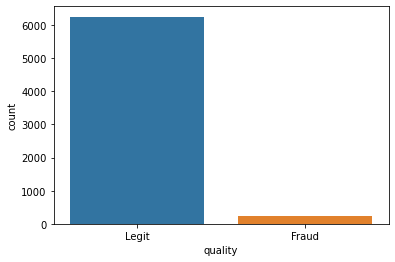

In [41]:
sns.countplot(data=df, x='quality');

It is a bit unbalanced dataset. There are only a few rows which are labed as 'Fraud' and only 3.786% of the whole dataset.

In [42]:
len(df[df['quality'] == 'Fraud']) / len(df['quality']) * 100

3.7863629367400335

------

**TASK: Let's find out if there is a difference between red and white wine when it comes to fraud. Create a countplot that has the wine *type* on the x axis with the hue separating columns by Fraud vs Legit.**

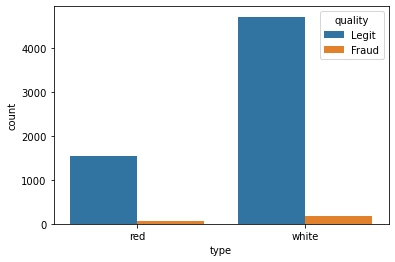

In [43]:
sns.countplot(data=df, x='type', hue='quality');

As per the chart above, there are a bit more Fraud wine in `White` compared to `Red`.

------

**TASK: What percentage of red wines are Fraud? What percentage of white wines are fraud?**

In [46]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [47]:
red = df[df['type']=='red']

In [48]:
white = df[df['type'] == 'white']

In [50]:
# red wine Fraud %
print("Percentage of fraud in Red Wines:")
print(100* (len(red[red['quality']=='Fraud'])/len(red)))

Percentage of fraud in Red Wines:
3.9399624765478425


In [51]:
# white wine Fraud %
print("Percentage of fraud in White Wines:")
print(100* (len(white[white['quality']=='Fraud'])/len(white)))

Percentage of fraud in White Wines:
3.7362188648427925


-------

**TASK: Calculate the correlation between the various features and the "quality" column. To do this you may need to map the column to 0 and 1 instead of a string.**

In [52]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red


In [68]:
# As quality value is currently string, map the quality column to 0 , 1
df['Fraud'] = df['quality'].map({'Legit': 0,'Fraud': 1})

In [69]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red,0


In [75]:
df.corr()['Fraud'][:-1].sort_values(ascending=False)

volatile acidity        0.151228
chlorides               0.034499
fixed acidity           0.021794
pH                      0.020107
density                 0.016351
sulphates              -0.034046
total sulfur dioxide   -0.035252
residual sugar         -0.048756
alcohol                -0.051141
citric acid            -0.061789
free sulfur dioxide    -0.085204
Name: Fraud, dtype: float64

------

**TASK: Create a bar plot of the correlation values to Fraudlent wine.**

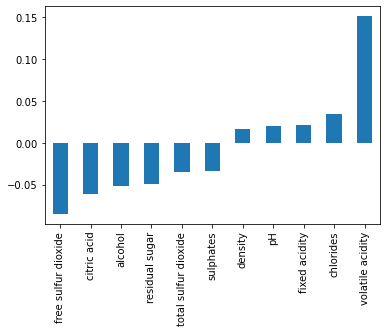

In [78]:
df.corr()['Fraud'][:-1].sort_values().plot(kind='bar');

------

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

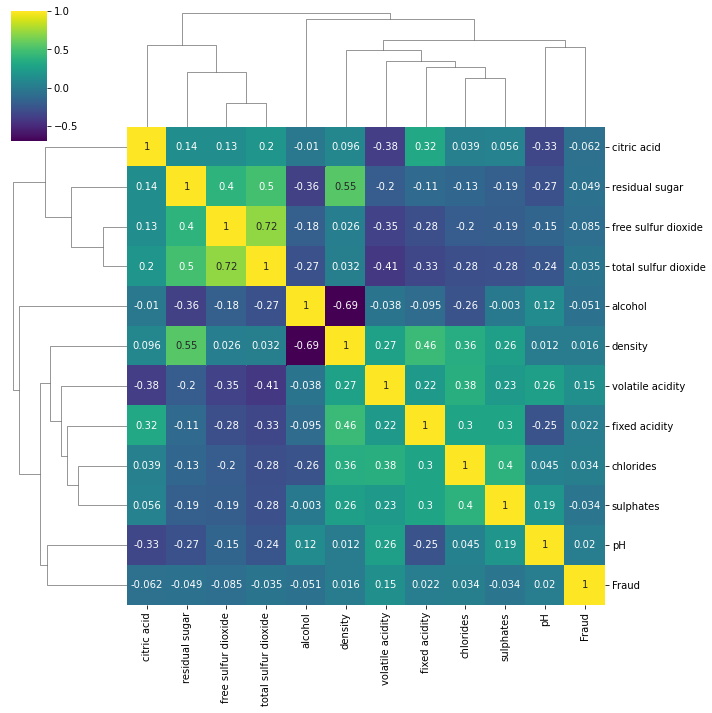

In [87]:
sns.clustermap(df.corr(), cmap='viridis', annot=True);

-------

----
## Machine Learning Model

**TASK: Convert the categorical column "type" from a string or "red" or "white" to dummy variables:**

In [92]:
df['type'] = pd.get_dummies(df['type'], drop_first=True)

In [93]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0,0


In [ ]:
# remove the extra Fraud column
df = df.drop('Fraud', axis=1)

In [97]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0


----

**TASK: Separate out the data into X features and y target label ("quality" column)**

In [98]:
X = df.drop('quality', axis=1)
y = df['quality']

**TASK: Perform a Train|Test split on the data, with a 10% test size. Note: The solution uses a random state of 101**

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Scale the X train and X test data.**

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()

In [103]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

------

**TASK: Create an instance of a Support Vector Machine classifier. Previously we have left this model "blank", (e.g. with no parameters). However, we already know that the classes are unbalanced, in an attempt to help alleviate this issue, we can automatically adjust weights inversely proportional to class frequencies in the input data with a argument call in the SVC() call. Check out the [documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) online and look up what the argument\parameter is.**

In [105]:
from sklearn.svm import SVC

**IMPORTANT NOTE:**

The “balanced” mode uses the values of y to automatically adjust weights **inversely proportional** to class frequencies in the input data.

Reason: we know that Fraud cases are very small proporation compared to Legit cases. So during training we want to weight more on Fraud cases so that model can learn more. As balanced mode is inversely proportaional, the less the cases appear, the more weight it will be put on.

In [107]:
base_model = SVC(class_weight='balanced')

In [110]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  

**TASK: Use a GridSearchCV to run a grid search for the best C and gamma parameters.**

In [108]:
from sklearn.model_selection import GridSearchCV

In [111]:
parameters = {
    'C': [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [1, 2, 3],
    'gamma': ['scale', 'auto'],
}

In [112]:
grid_model = GridSearchCV(base_model, parameters)

In [113]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2],
                         'degree': [1, 2, 3], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [116]:
grid_model.best_params_

{'C': 0.001, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}

----

**TASK: Display the confusion matrix and classification report for your model.**

In [118]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [119]:
y_pred = grid_model.predict(scaled_X_test)

In [120]:
confusion_matrix(y_test, y_pred)

array([[  3,  24],
       [  6, 617]], dtype=int64)

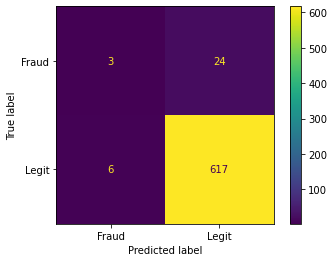

In [123]:
plot_confusion_matrix(grid_model, scaled_X_test, y_test);

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Fraud       0.33      0.11      0.17        27
       Legit       0.96      0.99      0.98       623

    accuracy                           0.95       650
   macro avg       0.65      0.55      0.57       650
weighted avg       0.94      0.95      0.94       650



**TASK: Finally, think about how well this model performed, would you suggest using it? Realistically will this work?**

Using chemical analysis to detect wine fraud can be a first step. However we might we want to expand the features such as where we made the purchase, what the label looks like, etc.